In [146]:
import pandas as pd
import re, string
from nltk.corpus import stopwords
import numpy as np
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import TweetTokenizer  

In [147]:
#settings
eng_stopwords = set(stopwords.words("english"))

lem = WordNetLemmatizer()
tokenizer=TweetTokenizer()

%matplotlib inline

In [148]:
dfOriginal=pd.read_csv("../data/aquarium/20180821_Tatvam_Export.csv")
df=dfOriginal.loc[dfOriginal["Review Comment"].isnull()==False]
df.head()

,Unique ID,Review Title,Review Comment,Tatvam Rating,User Rating,Source Name,Review URL,Date,Name,Customer,Parent Value,Value,Tag Tatvam Rating,Review Month
4216,5238258,NaN,Overpriced !!!!!!!,1,1,Google Reviews,https://www.google.co.in/maps/place/Georgia+Aq...,"Wednesday, January 10, 2018",Jim Glekas,Georgia Aquarium,NaN,NaN,NaN,January
4217,5264943,NaN,If you are a police officer dont think you can...,1,1,Google Reviews,https://www.google.co.in/maps/place/Georgia+Aq...,"Wednesday, January 17, 2018",Mallory brabham,Georgia Aquarium,Staff,Staff,1.0,January
4218,5383360,NaN,"the whale shark looked retarded, fishes wouldn...",1,1,Google Reviews,https://www.google.co.in/maps/place/Georgia+Aq...,"Wednesday, January 17, 2018",hot chito,Georgia Aquarium,Ocean Voyager,Whale Sharks,3.0,January
4219,5383380,NaN,"It's like a zoo for people, rather than fish. ...",1,1,Google Reviews,https://www.google.co.in/maps/place/Georgia+Aq...,"Wednesday, January 24, 2018",Seth Manzano-Flores,Georgia Aquarium,Aquarium,Aquarium,2.0,January
4220,5383380,NaN,"It's like a zoo for people, rather than fish. ...",1,1,Google Reviews,https://www.google.co.in/maps/place/Georgia+Aq...,"Wednesday, January 24, 2018",Seth Manzano-Flores,Georgia Aquarium,Crowd,Crowd,1.0,January


In [149]:
dfSum=pd.DataFrame()
dfSum["Unique ID"]=df.groupby(["Unique ID"]).agg(["count"]).reset_index()["Unique ID"]
dfSum["Review Comment Count"]=df.groupby(["Unique ID"]).agg(["count"]).reset_index()["Review Comment"]

In [150]:
dfSum.shape

(6657, 2)

In [151]:
dfSum=pd.merge(dfSum,df[["Unique ID","Review Title","Review Comment","Tatvam Rating","User Rating","Source Name","Review URL","Date","Name","Review Month"]].drop_duplicates(),how="left",on="Unique ID")

In [152]:
dfSum.shape

(6657, 11)

In [153]:
dfSum.head()

,Unique ID,Review Comment Count,Review Title,Review Comment,Tatvam Rating,User Rating,Source Name,Review URL,Date,Name,Review Month
0,5223719,10,Spectacular,If you love aquariums this is one of the large...,5,4,Trip Advisor,http://www.tripadvisor.in/ShowUserReviews-g608...,"Monday, January 1, 2018",Maria F,January
1,5223720,4,Great Aquarium with Capacity Issues,The aquarium was amazing and the staff was hel...,4,4,Trip Advisor,http://www.tripadvisor.in/ShowUserReviews-g608...,"Monday, January 1, 2018",Chris F,January
2,5223721,1,UCF PEP RALLY,"Being from Orlando, we tend to compare everyth...",5,4,Trip Advisor,http://www.tripadvisor.in/ShowUserReviews-g608...,"Monday, January 1, 2018",Tamara D,January
3,5223722,7,Overwhelmingly crowded and not worth the cost ...,We booked in advance so as to avoid the lines....,2,3,Trip Advisor,http://www.tripadvisor.in/ShowUserReviews-g608...,"Monday, January 1, 2018",CosmoChickNYer,January
4,5223724,2,NaN,I enjoyed the ga aquarium and would recommend ...,5,5,Facebook,https://www.facebook.com/tfriday98/posts/10214...,"Tuesday, January 2, 2018",Trini Tee,January


In [154]:
dfTemp=df.groupby("Unique ID")["Parent Value"].apply(lambda x: ','.join(set(x.dropna()))).reset_index()
dfTemp.rename(columns={'Parent Value': 'Parent Value Sum'}, inplace=True)
dfTemp.head()

,Unique ID,Parent Value Sum
0,5223719,"Website,Price,Dolphin Show,Discount,Aquarium,P..."
1,5223720,"Price,Aquarium,Staff"
2,5223721,Aquarium
3,5223722,"Food,Price,Aquarium,Crowd,Others"
4,5223724,Aquarium


In [155]:
dfSum=pd.merge(dfSum,dfTemp,how="left",on="Unique ID")

In [156]:
dfSum.shape

(6657, 12)

In [157]:
dfSum.head()

,Unique ID,Review Comment Count,Review Title,Review Comment,Tatvam Rating,User Rating,Source Name,Review URL,Date,Name,Review Month,Parent Value Sum
0,5223719,10,Spectacular,If you love aquariums this is one of the large...,5,4,Trip Advisor,http://www.tripadvisor.in/ShowUserReviews-g608...,"Monday, January 1, 2018",Maria F,January,"Website,Price,Dolphin Show,Discount,Aquarium,P..."
1,5223720,4,Great Aquarium with Capacity Issues,The aquarium was amazing and the staff was hel...,4,4,Trip Advisor,http://www.tripadvisor.in/ShowUserReviews-g608...,"Monday, January 1, 2018",Chris F,January,"Price,Aquarium,Staff"
2,5223721,1,UCF PEP RALLY,"Being from Orlando, we tend to compare everyth...",5,4,Trip Advisor,http://www.tripadvisor.in/ShowUserReviews-g608...,"Monday, January 1, 2018",Tamara D,January,Aquarium
3,5223722,7,Overwhelmingly crowded and not worth the cost ...,We booked in advance so as to avoid the lines....,2,3,Trip Advisor,http://www.tripadvisor.in/ShowUserReviews-g608...,"Monday, January 1, 2018",CosmoChickNYer,January,"Food,Price,Aquarium,Crowd,Others"
4,5223724,2,NaN,I enjoyed the ga aquarium and would recommend ...,5,5,Facebook,https://www.facebook.com/tfriday98/posts/10214...,"Tuesday, January 2, 2018",Trini Tee,January,Aquarium


In [158]:
dfSum['Parent Value Count']=dfSum["Parent Value Sum"].apply(lambda x: len(x.split(',')))

In [159]:
dfTemp=df.groupby("Unique ID")["Value"].apply(lambda x: ','.join(set(x.dropna()))).reset_index()
dfTemp.rename(columns={'Value': 'Value Sum'}, inplace=True)
dfSum=pd.merge(dfSum,dfTemp,how="left",on="Unique ID")
dfSum['Value Count']=dfSum["Value Sum"].apply(lambda x: len(x.split(',')))
dfSum.head()

,Unique ID,Review Comment Count,Review Title,Review Comment,Tatvam Rating,User Rating,Source Name,Review URL,Date,Name,Review Month,Parent Value Sum,Parent Value Count,Value Sum,Value Count
0,5223719,10,Spectacular,If you love aquariums this is one of the large...,5,4,Trip Advisor,http://www.tripadvisor.in/ShowUserReviews-g608...,"Monday, January 1, 2018",Maria F,January,"Website,Price,Dolphin Show,Discount,Aquarium,P...",8,"Online,Exhibit,Entertainment,Dolphin Show,3D M...",10
1,5223720,4,Great Aquarium with Capacity Issues,The aquarium was amazing and the staff was hel...,4,4,Trip Advisor,http://www.tripadvisor.in/ShowUserReviews-g608...,"Monday, January 1, 2018",Chris F,January,"Price,Aquarium,Staff",3,"Exhibit,Aquarium,Worth,Staff",4
2,5223721,1,UCF PEP RALLY,"Being from Orlando, we tend to compare everyth...",5,4,Trip Advisor,http://www.tripadvisor.in/ShowUserReviews-g608...,"Monday, January 1, 2018",Tamara D,January,Aquarium,1,Aquarium,1
3,5223722,7,Overwhelmingly crowded and not worth the cost ...,We booked in advance so as to avoid the lines....,2,3,Trip Advisor,http://www.tripadvisor.in/ShowUserReviews-g608...,"Monday, January 1, 2018",CosmoChickNYer,January,"Food,Price,Aquarium,Crowd,Others",5,"Sea Lion,Crowd,Food,Experience,Seat,Aquarium,P...",7
4,5223724,2,NaN,I enjoyed the ga aquarium and would recommend ...,5,5,Facebook,https://www.facebook.com/tfriday98/posts/10214...,"Tuesday, January 2, 2018",Trini Tee,January,Aquarium,1,"Aquarium,Entertainment",2


In [160]:
def agg_numeric(df, group_var, df_name):
    
    # Remove id variables other than grouping variable
    for col in df:
        if col != group_var and 'SK_ID' in col:
            df = df.drop(columns = col)
            
    group_ids = df[group_var]
    numeric_df = df.select_dtypes(['number'])
    numeric_df[group_var] = group_ids

    # Group by the specified variable and calculate the statistics
    agg = numeric_df.groupby(group_var).agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()

    # Need to create new column names
    columns = [group_var]

    # Iterate through the variables names
    for var in agg.columns.levels[0]:
        # Skip the grouping variable
        if var != group_var:
            # Iterate through the stat names
            for stat in agg.columns.levels[1][:-1]:
                # Make a new column name for the variable and stat
                columns.append('%s_%s_%s' % (df_name, var, stat))

    agg.columns = columns
    return agg

In [161]:
dfTemp=agg_numeric(df,"Unique ID","Tag Tatvam Rating")[["Unique ID","Tag Tatvam Rating_Tag Tatvam Rating_count","Tag Tatvam Rating_Tag Tatvam Rating_mean","Tag Tatvam Rating_Tag Tatvam Rating_max","Tag Tatvam Rating_Tag Tatvam Rating_min","Tag Tatvam Rating_Tag Tatvam Rating_sum"]]
dfTemp.rename(columns={"Tag Tatvam Rating_Tag Tatvam Rating_count":"Tag Tatvam Rating Count","Tag Tatvam Rating_Tag Tatvam Rating_mean":"Tag Tatvam Rating Mean","Tag Tatvam Rating_Tag Tatvam Rating_max":"Tag Tatvam Rating Max","Tag Tatvam Rating_Tag Tatvam Rating_min":"Tag Tatvam Rating Min","Tag Tatvam Rating_Tag Tatvam Rating_sum":"Tag Tatvam Rating Sum"}, inplace=True)
dfTemp.head()

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Unique ID,Tag Tatvam Rating Count,Tag Tatvam Rating Mean,Tag Tatvam Rating Max,Tag Tatvam Rating Min,Tag Tatvam Rating Sum
0,5223719,10,4.600000,5.0,3.0,46.0
1,5223720,4,5.000000,5.0,5.0,20.0
2,5223721,1,5.000000,5.0,5.0,5.0
3,5223722,7,2.428571,3.0,1.0,17.0
4,5223724,2,5.000000,5.0,5.0,10.0


In [162]:
dfSum=pd.merge(dfSum,dfTemp,how="left",on="Unique ID")
dfSum.head()

,Unique ID,Review Comment Count,Review Title,Review Comment,Tatvam Rating,User Rating,Source Name,Review URL,Date,Name,Review Month,Parent Value Sum,Parent Value Count,Value Sum,Value Count,Tag Tatvam Rating Count,Tag Tatvam Rating Mean,Tag Tatvam Rating Max,Tag Tatvam Rating Min,Tag Tatvam Rating Sum
0,5223719,10,Spectacular,If you love aquariums this is one of the large...,5,4,Trip Advisor,http://www.tripadvisor.in/ShowUserReviews-g608...,"Monday, January 1, 2018",Maria F,January,"Website,Price,Dolphin Show,Discount,Aquarium,P...",8,"Online,Exhibit,Entertainment,Dolphin Show,3D M...",10,10,4.600000,5.0,3.0,46.0
1,5223720,4,Great Aquarium with Capacity Issues,The aquarium was amazing and the staff was hel...,4,4,Trip Advisor,http://www.tripadvisor.in/ShowUserReviews-g608...,"Monday, January 1, 2018",Chris F,January,"Price,Aquarium,Staff",3,"Exhibit,Aquarium,Worth,Staff",4,4,5.000000,5.0,5.0,20.0
2,5223721,1,UCF PEP RALLY,"Being from Orlando, we tend to compare everyth...",5,4,Trip Advisor,http://www.tripadvisor.in/ShowUserReviews-g608...,"Monday, January 1, 2018",Tamara D,January,Aquarium,1,Aquarium,1,1,5.000000,5.0,5.0,5.0
3,5223722,7,Overwhelmingly crowded and not worth the cost ...,We booked in advance so as to avoid the lines....,2,3,Trip Advisor,http://www.tripadvisor.in/ShowUserReviews-g608...,"Monday, January 1, 2018",CosmoChickNYer,January,"Food,Price,Aquarium,Crowd,Others",5,"Sea Lion,Crowd,Food,Experience,Seat,Aquarium,P...",7,7,2.428571,3.0,1.0,17.0
4,5223724,2,NaN,I enjoyed the ga aquarium and would recommend ...,5,5,Facebook,https://www.facebook.com/tfriday98/posts/10214...,"Tuesday, January 2, 2018",Trini Tee,January,Aquarium,1,"Aquarium,Entertainment",2,2,5.000000,5.0,5.0,10.0


In [200]:
text=dfSum['Review Comment'].iloc[4]+' aquarium '
text

'I enjoyed the ga aquarium and would recommend to anyone who is looking for family entertainment. aquarium '

In [202]:
len(set(text.split()))

16

In [206]:
dfSum["Num Words"] = dfSum["Review Comment"].apply(lambda x: len(x.split()))
dfSum['Total Length'] = dfSum['Review Comment'].apply(len)
dfSum['Num Unique Words'] = dfSum['Review Comment'].apply(lambda comment: len(set(comment.split())))
dfSum["Review Comment Centence Num"] = dfSum["Review Comment"].apply(lambda x: len(re.findall('\. ',x))+len(re.findall('\! ',x))+x.endswith(".")*1)
dfSum['Review Comment Capitals'] = dfSum['Review Comment'].apply(lambda comment: sum(1 for c in comment if c.isupper()))
dfSum['Num Exclamation Marks'] = dfSum['Review Comment'].apply(lambda comment: comment.count('!'))


dfSum['Caps Vs Length'] = dfSum.apply(lambda row: float(row['Review Comment Capitals'])/float(row['Total Length']),axis=1)
dfSum['Words Vs Unique'] = dfSum['Num Unique Words'] / dfSum['Num Words']

In [207]:
dfSum.head(2)

,Unique ID,Review Comment Count,Review Title,Review Comment,Tatvam Rating,User Rating,Source Name,Review URL,Date,Name,...,Tag Tatvam Rating Sum,Review Comment Length,Review Comment Centence Num,Num Words,Total Length,Num Unique Words,Review Comment Capitals,Num Exclamation Marks,Caps Vs Length,Words Vs Unique
0,5223719,10,Spectacular,If you love aquariums this is one of the large...,5,4,Trip Advisor,http://www.tripadvisor.in/ShowUserReviews-g608...,"Monday, January 1, 2018",Maria F,...,46.0,109,11,109,590,84,12,0,0.020339,0.770642
1,5223720,4,Great Aquarium with Capacity Issues,The aquarium was amazing and the staff was hel...,4,4,Trip Advisor,http://www.tripadvisor.in/ShowUserReviews-g608...,"Monday, January 1, 2018",Chris F,...,20.0,84,4,84,505,62,4,0,0.007921,0.738095


# Check Correlation

In [208]:
dfSum.columns

Index([u'Unique ID', u'Review Comment Count', u'Review Title',
       u'Review Comment', u'Tatvam Rating', u'User Rating', u'Source Name',
       u'Review URL', u'Date', u'Name', u'Review Month', u'Parent Value Sum',
       u'Parent Value Count', u'Value Sum', u'Value Count',
       u'Tag Tatvam Rating Count', u'Tag Tatvam Rating Mean',
       u'Tag Tatvam Rating Max', u'Tag Tatvam Rating Min',
       u'Tag Tatvam Rating Sum', u'Review Comment Length',
       u'Review Comment Centence Num', u'Num Words', u'Total Length',
       u'Num Unique Words', u'Review Comment Capitals',
       u'Num Exclamation Marks', u'Caps Vs Length', u'Words Vs Unique'],
      dtype='object')

In [213]:
features = ('Parent Value Count', 'Value Count', 'Tag Tatvam Rating Count', 'Tag Tatvam Rating Mean','Tag Tatvam Rating Max', 'Tag Tatvam Rating Min', 'Tag Tatvam Rating Sum', 'Review Comment Length','Review Comment Centence Num', 'Num Words', 'Total Length','Num Unique Words','Review Comment Capitals','Num Exclamation Marks','Caps Vs Length','Words Vs Unique')
columns = ('Tatvam Rating', 'User Rating')

rows = [{c:dfSum[f].corr(dfSum[c]) for c in columns} for f in features]
df_correlations = pd.DataFrame(rows, index=features)

In [214]:
df_correlations

,Tatvam Rating,User Rating
Parent Value Count,-0.221589,-0.114666
Value Count,-0.224944,-0.121118
Tag Tatvam Rating Count,-0.242356,-0.131284
Tag Tatvam Rating Mean,0.845212,0.631621
Tag Tatvam Rating Max,0.713112,0.567105
Tag Tatvam Rating Min,0.764136,0.525481
Tag Tatvam Rating Sum,-0.062596,0.012037
Review Comment Length,-0.282128,-0.198890
Review Comment Centence Num,-0.269939,-0.179574
Num Words,-0.282128,-0.198890


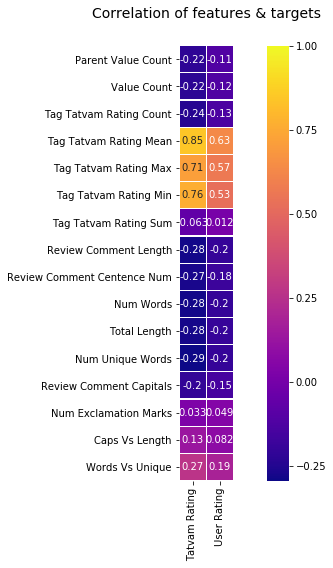

In [225]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
colormap = plt.cm.plasma
plt.figure(figsize=(12,8))
plt.title('Correlation of features & targets',y=1.05,size=14)
ax = sns.heatmap(df_correlations,linewidths=0.2,vmax=1.0,square=True,cmap=colormap,linecolor='white',annot=True)

In [228]:
import plotly.graph_objs as go

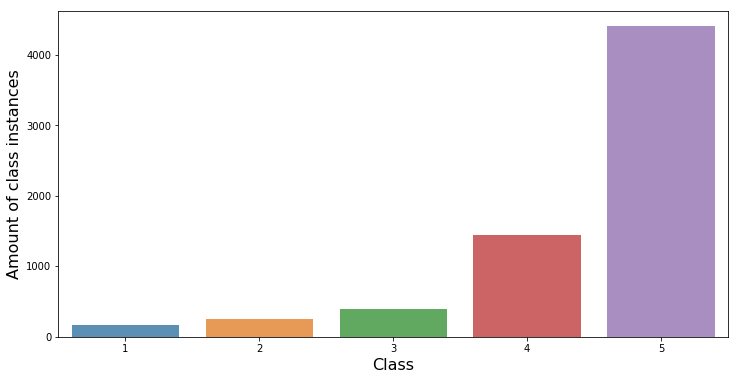

In [231]:
# all platform, Tatvam Rating distribution
dfTemp=dfSum["Tatvam Rating"]
plt.figure(figsize=(12,6))
sns.barplot(dfTemp.value_counts().index, dfTemp.value_counts().values, alpha=0.8)
plt.ylabel('Amount of class instances', fontsize=16)
plt.xlabel('Class', fontsize=16)
plt.show();

In [241]:
dfSum.columns

Index([u'Unique ID', u'Review Comment Count', u'Review Title',
       u'Review Comment', u'Tatvam Rating', u'User Rating', u'Source Name',
       u'Review URL', u'Date', u'Name', u'Review Month', u'Parent Value Sum',
       u'Parent Value Count', u'Value Sum', u'Value Count',
       u'Tag Tatvam Rating Count', u'Tag Tatvam Rating Mean',
       u'Tag Tatvam Rating Max', u'Tag Tatvam Rating Min',
       u'Tag Tatvam Rating Sum', u'Review Comment Length',
       u'Review Comment Centence Num', u'Num Words', u'Total Length',
       u'Num Unique Words', u'Review Comment Capitals',
       u'Num Exclamation Marks', u'Caps Vs Length', u'Words Vs Unique'],
      dtype='object')

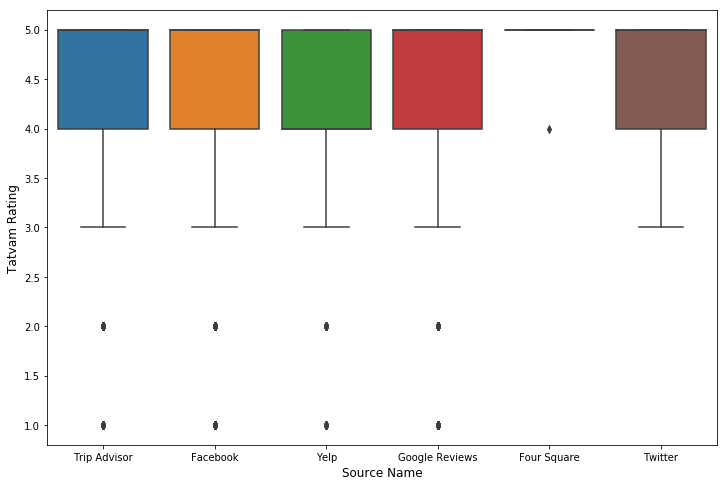

In [244]:
plt.figure(figsize=(12,8))
sns.boxplot(x="Source Name", y="Tatvam Rating", data=dfSum)
plt.xlabel('Source Name', fontsize=12)
plt.ylabel('Tatvam Rating', fontsize=12)
plt.show()

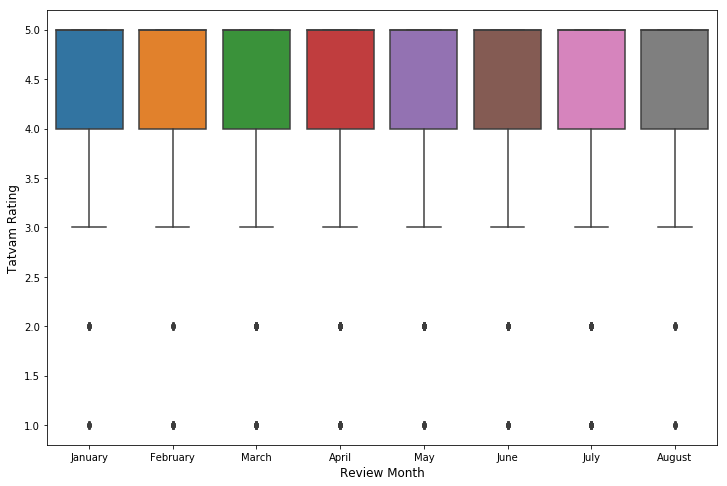

In [245]:
plt.figure(figsize=(12,8))
sns.boxplot(x="Review Month", y="Tatvam Rating", data=dfSum)
plt.xlabel('Review Month', fontsize=12)
plt.ylabel('Tatvam Rating', fontsize=12)
plt.show()

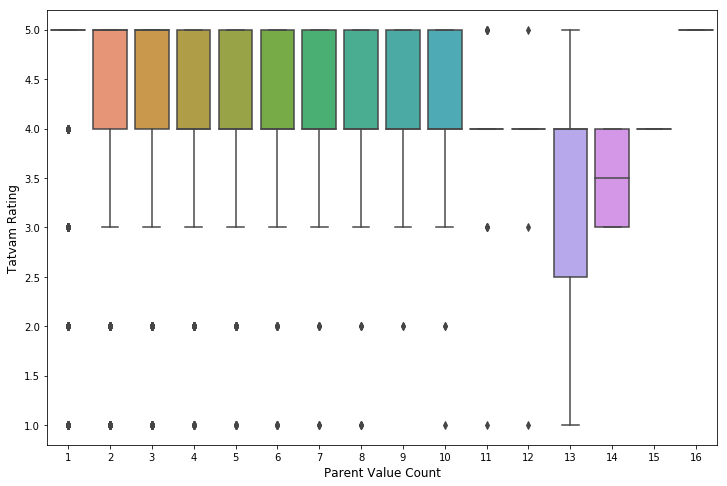

In [246]:
plt.figure(figsize=(12,8))
sns.boxplot(x="Parent Value Count", y="Tatvam Rating", data=dfSum)
plt.xlabel('Parent Value Count', fontsize=12)
plt.ylabel('Tatvam Rating', fontsize=12)
plt.show()

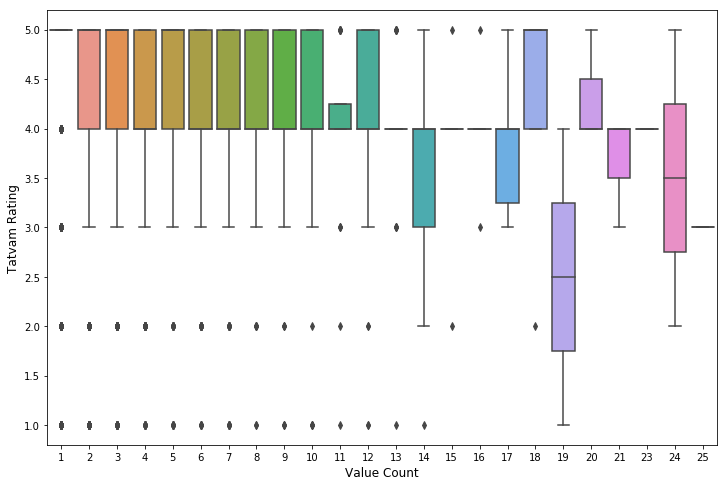

In [247]:
plt.figure(figsize=(12,8))
sns.boxplot(x="Value Count", y="Tatvam Rating", data=dfSum)
plt.xlabel('Value Count', fontsize=12)
plt.ylabel('Tatvam Rating', fontsize=12)
plt.show()

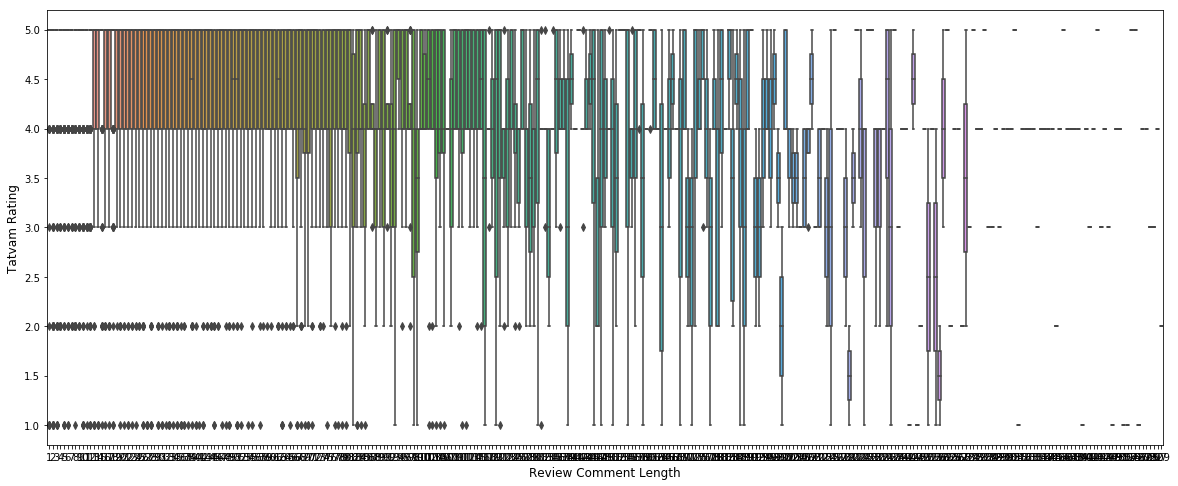

In [249]:
plt.figure(figsize=(20,8))
sns.boxplot(x="Review Comment Length", y="Tatvam Rating", data=dfSum)
plt.xlabel('Review Comment Length', fontsize=12)
plt.ylabel('Tatvam Rating', fontsize=12)
plt.show()

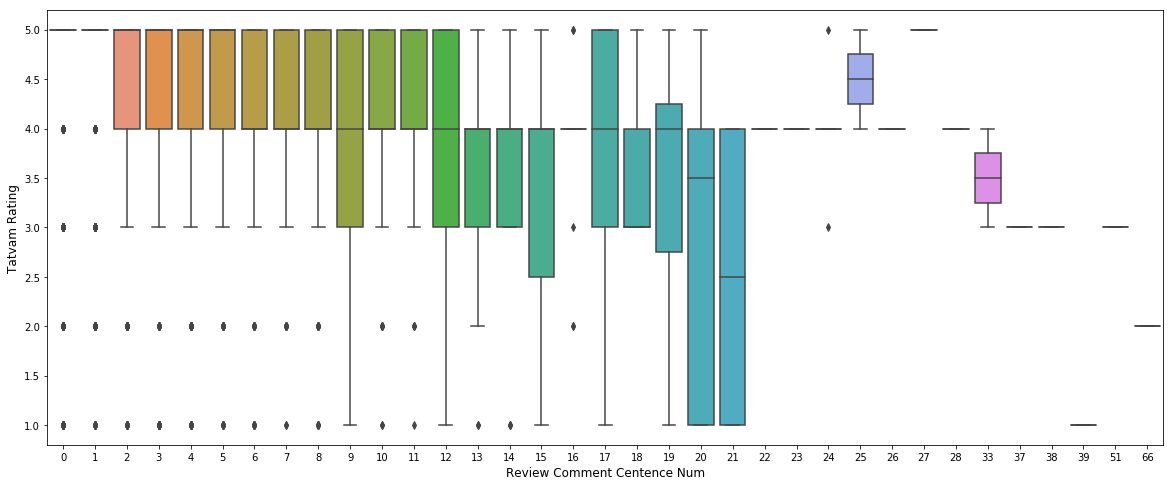

In [250]:
plt.figure(figsize=(20,8))
sns.boxplot(x="Review Comment Centence Num", y="Tatvam Rating", data=dfSum)
plt.xlabel('Review Comment Centence Num', fontsize=12)
plt.ylabel('Tatvam Rating', fontsize=12)
plt.show()

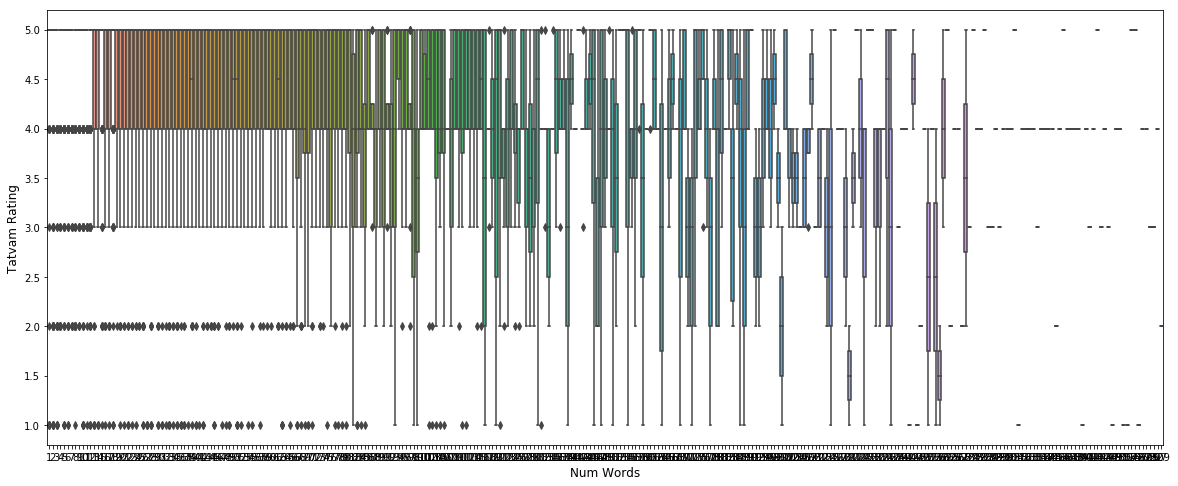

In [251]:
plt.figure(figsize=(20,8))
sns.boxplot(x="Num Words", y="Tatvam Rating", data=dfSum)
plt.xlabel('Num Words', fontsize=12)
plt.ylabel('Tatvam Rating', fontsize=12)
plt.show()

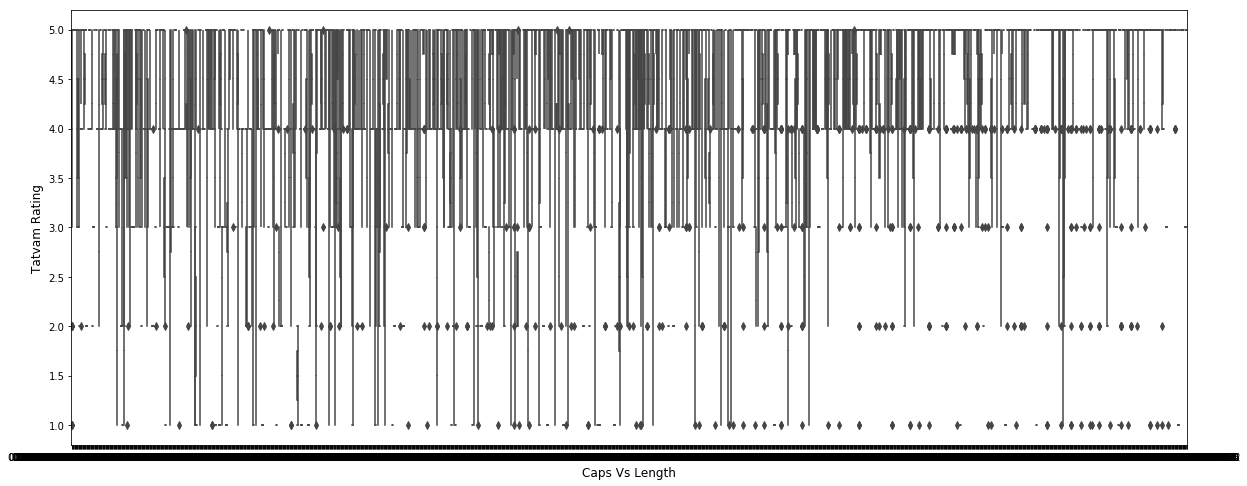

In [252]:
plt.figure(figsize=(20,8))
sns.boxplot(x="Caps Vs Length", y="Tatvam Rating", data=dfSum)
plt.xlabel('Caps Vs Length', fontsize=12)
plt.ylabel('Tatvam Rating', fontsize=12)
plt.show()